In [331]:
library(tidyr)
library(tidyverse)
library(dplyr)
library(ggplot2)
library("ggpubr")
library(rstatix)


In [314]:
CREMP_Counts = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/CREMP_data/CREMP_Counts.csv", 
                header = T
)
head(CREMP_Counts , n=2)
dim(CREMP_Counts )


CREMP_LTA = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/CREMP_data/CREMP_LTA.csv", 
                header = T
)
head(CREMP_LTA , n=2)
dim(CREMP_LTA )



CREMP_Cover = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/CREMP_data/CREMP_percentcover_taxagroups.csv", 
                header = T
)
head(CREMP_Cover , n=2)
dim(CREMP_Cover)



temp = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/CREMP_data/FKNMS Temperature 26-36-37-38.txt", 
                header = T
)
head(temp , n=2)
dim(temp)

,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,Dichocoenia_stokesii,Stephanocoenia_intersepta,Montastraea_cavernosa,⋯,Porites_porites,Scleractinia,Scolymia_cubensis,Scolymia_lacera,Siderastrea_radians,Solenastrea_bournoni,Agaricia_agaricites_complex,Agaricia_fragilis,Agaricia_lamarcki,Cladocor_arbuscula
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2011,7/14/2011,LK,P,26,Red Dun Reef,261,2,26,10,⋯,1,0,0,0,0,0,18,0,0,0
2,2012,7/9/2012,LK,P,26,Red Dun Reef,261,1,20,7,⋯,3,0,1,0,0,0,7,0,0,0


[1] 202  51

,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,Dichocoenia_stokesii,Stephanocoenia_intersepta,Montastraea_cavernosa,⋯,Porites_porites,Scleractinia,Scolymia_cubensis,Scolymia_lacera,Siderastrea_radians,Solenastrea_bournoni,Agaricia_agaricites_complex,Agaricia_fragilis,Agaricia_lamarcki,Cladocora_arbuscula
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011,7/14/2011,LK,P,26,Red Dun Reef,261,775.1,2692.3,22465.0,⋯,390.7,0,0.0,0,0,0,1675.9,0,0,0
2,2012,7/9/2012,LK,P,26,Red Dun Reef,261,519.5,2229.1,22904.3,⋯,330.1,0,17.4,0,0,0,1083.5,0,0,0


[1] 202  50

,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,points,Cyanobacteria,Macroalgae,Octocoral,Others,Porifera,Seagrass,Stony_coral,Substrate,Unknown,Zoanthidea
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2009,8/11/2009,LK,P,26,Red Dun Reef,261,821,NA,0.0122,0.257,0.0012,0.0451,0,0.1839,0.5006,NA,0.0000
2,2010,8/3/2010,LK,P,26,Red Dun Reef,261,1059,0,0.0094,0.322,0.0028,0.0434,0,0.1048,0.5137,NA,0.0038


[1] 336  18

,SiteID,SiteName,Year,Month,Day,Time,TempC,TempF
,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,26,Red Dun Reef,2009,9,29,15,30.268,86.482
2,26,Red Dun Reef,2009,9,29,16,30.217,86.391


[1] 503476      8

In [274]:
meta = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/meta_EPA2.csv",
               header=TRUE, row.names=1)  %>%
rename(Site_name=Site.Name)
meta$Site_Num <- as.integer(meta$Site_Num)
meta$Site.Status <- factor(meta$Site.Status, levels = c("Vulnerable",
                                                         "Epidemic","Endemic"))
head(meta)


,dup_sample.ID,samp,Sample.ID,Site,Site_name,Region,Project,Objective,Type,Species_sample,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
518.H,518.H,518.H_S18,518.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,cor,Coral,OFAV,⋯,0,1,0,0,0,0,0,0,0,0
519.H,519.H,519.H_S18,519.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,cor,Coral,OFAV,⋯,0,1,0,0,0,0,0,0,0,0
520.H,520.H,520.H_S18,520.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,cor,Coral,OFAV,⋯,0,1,0,0,0,0,0,0,0,0
521.H,521.H,521.H_S18,521.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,cor,Coral,MCAV,⋯,0,1,0,0,0,0,0,0,0,0
522.H,522.H,522.H_S18,522.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,cor,Coral,MCAV,⋯,0,1,0,0,0,0,0,0,0,0
523.H,523.H,523.H_S18,523.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,cor,Coral,MCAV,⋯,0,1,0,0,0,0,0,0,0,0


In [325]:
CREMP_Counts2 <- CREMP_Counts %>%
  group_by(Date, Site_name, Year) %>%
  select(Date, Site_name, Year, Dichocoenia_stokesii, Stephanocoenia_intersepta,
         Montastraea_cavernosa, Pseudodiploria_strigosa, Orbicella_spp) %>%
  pivot_longer(
    cols = c(Dichocoenia_stokesii, Stephanocoenia_intersepta,
             Montastraea_cavernosa, Pseudodiploria_strigosa, Orbicella_spp),
    names_to = "Coral_Species",
    values_to = "Counts"
  ) %>%
  mutate(
    Species_sample = case_when(
      Coral_Species == "Dichocoenia_stokesii" ~ "D. stokesii",
      Coral_Species == "Stephanocoenia_intersepta" ~ "S. intersepta",
      Coral_Species == "Montastraea_cavernosa" ~ "M. cavernosa",
      Coral_Species == "Pseudodiploria_strigosa" ~ "P. strigosa",
      Coral_Species == "Orbicella_spp" ~ "Orbicella spp.",
      TRUE ~ NA_character_
    ),
    Stage = case_when(
      Year == 2018 ~ "Vulnerable",
      TRUE ~ NA_character_
    )
      
  )


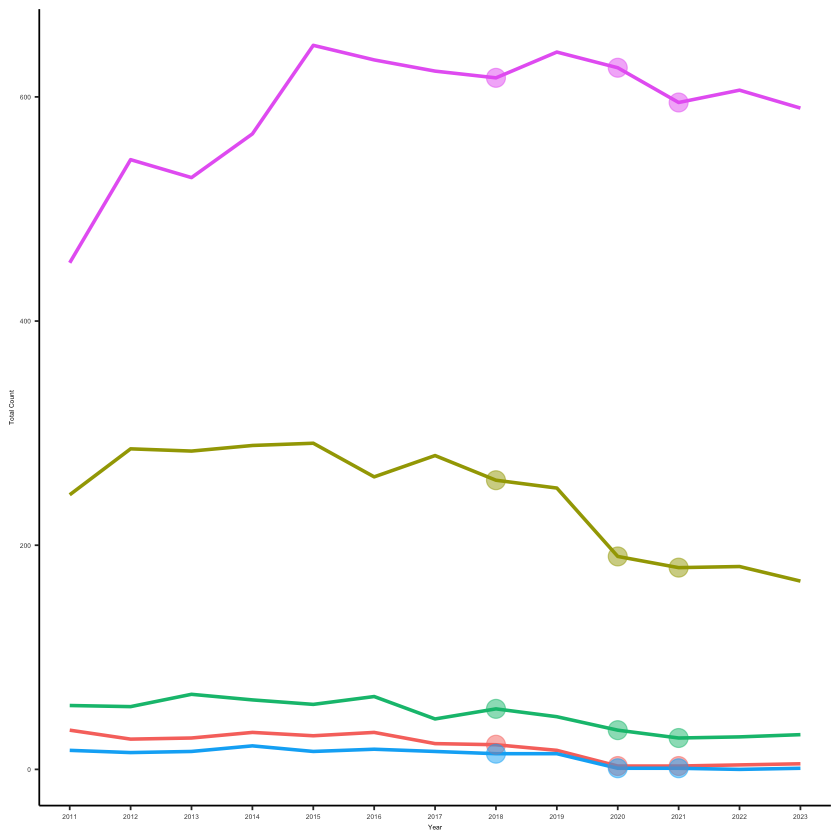

In [371]:

fig1 = CREMP_Counts2%>%
  ggplot(aes(x = Year, y = Counts, color = Species_sample)) +
  
  # Line summarizing counts per year
  stat_summary(fun = sum, geom = "line", size = 1) +
  
  # Add points for 2018, 2020, 2021
  stat_summary(
    data = . %>% filter(Year %in% c(2018, 2020, 2021)),
    fun = sum,
    geom = "point",
    size = 5,
    alpha=0.5
  ) +

  # Show all year ticks
  scale_x_continuous(
    breaks = sort(unique(CREMP_Counts$Year)),
    expand = expansion(add = 0.5)
  ) +
  
  labs(x = "Year", y = "Total Count", color = "Coral Species") +
 theme_classic() +
  theme(
    axis.title.x = element_text(size = 4),
    axis.title.y = element_text(size = 4),
    axis.text.x = element_text(size = 4),
    axis.text.y = element_text(size = 4),
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 6)
  ) +
guides(color="none")
fig1

In [366]:
CREMP_LTA2 = CREMP_LTA %>%
  group_by(Date, Site_name, Year) %>%
  select(Date, Site_name, Year, Dichocoenia_stokesii, Stephanocoenia_intersepta,
         Montastraea_cavernosa, Pseudodiploria_strigosa, Orbicella_spp) %>%
  pivot_longer(
    cols = c(Dichocoenia_stokesii, Stephanocoenia_intersepta,
             Montastraea_cavernosa, Pseudodiploria_strigosa, Orbicella_spp),
    names_to = "Coral_Species",
    values_to = "LTA"
  ) %>%
  mutate(
    Species_sample = case_when(
 
      Coral_Species == "Dichocoenia_stokesii" ~ "D. stokesii",
      Coral_Species == "Stephanocoenia_intersepta" ~ "S. intersepta",
      Coral_Species == "Montastraea_cavernosa" ~ "M. cavernosa",
      Coral_Species == "Pseudodiploria_strigosa" ~ "P. strigosa",
      Coral_Species == "Orbicella_spp" ~ "Orbicella spp.",
      TRUE ~ NA_character_
 ))

Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_segment()`).”


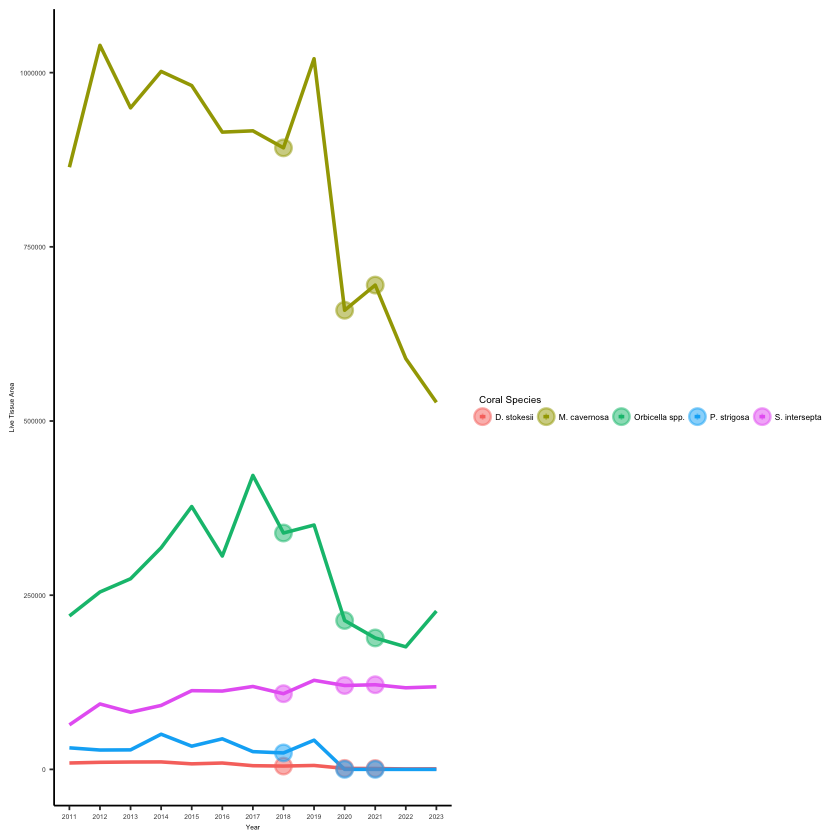

In [372]:


fig2=CREMP_LTA2 %>%
  ggplot(aes(x = Year, y = LTA, color = Species_sample)) +
  
  # Line summarizing counts per year
  stat_summary(fun = sum, geom = "line", size = 1) +
  
  # Add points for 2018, 2020, 2021
  stat_summary(
    data = . %>% filter(Year %in% c(2018, 2020, 2021)),
    fun = sum,
    size = 1,
    alpha=0.5
 
  ) +

  # Show all year ticks
  scale_x_continuous(
    breaks = sort(unique(CREMP_LTA$Year)),
    expand = expansion(add = 0.5)
  ) +
  
  labs(x = "Year", y = "Live Tissue Area", color = "Coral Species") +
   theme_classic() +
  theme(
     axis.title.x = element_text(size = 4),
    axis.title.y = element_text(size = 4),
    axis.text.x = element_text(size = 4),
    axis.text.y = element_text(size = 4),
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 6)
  ) +
guides(color = guide_legend(keywidth = .20, , keyheight =.25, nrow=1)) 
fig2

In [383]:
colors <- c("#0bdbb6", "#06402B","#56B4E9", "#8A7C64","#C52E6D", "green",
"#AD6F3B", "#6B5B95", "#8569D5", "#6F8FAF", "#5F7FC7",
"#56B4E9", "#40B5AD", "#8A7C64", "#CBD588", "#5E738F",
"#673770", "#006700", "#CD9BCD", "#D1A33D", "#D14285",
"#FAD02E", "#F28D35", "#C52E6D", "#6B5B95", "grey", "#AD6F3B",
 "#56B4E9", "#40B5AD", "#CBD588",
"#5E738F", "#673770", "#006700", "#CD9BCD", "#D1A33D",
"#FAD02E", "#F28D35", "#C52E6D", "#6B5B95", "#AD6F3B",
"#6F8FAF", "#8A7C64")

In [315]:
CREMP_Cover2=CREMP_Cover %>%
  group_by(Date, Site_name, Year) %>%
  pivot_longer(
      cols = Cyanobacteria: Zoanthidea,
    names_to = "Cover",
    values_to = "Cover_Counts"
  ) 

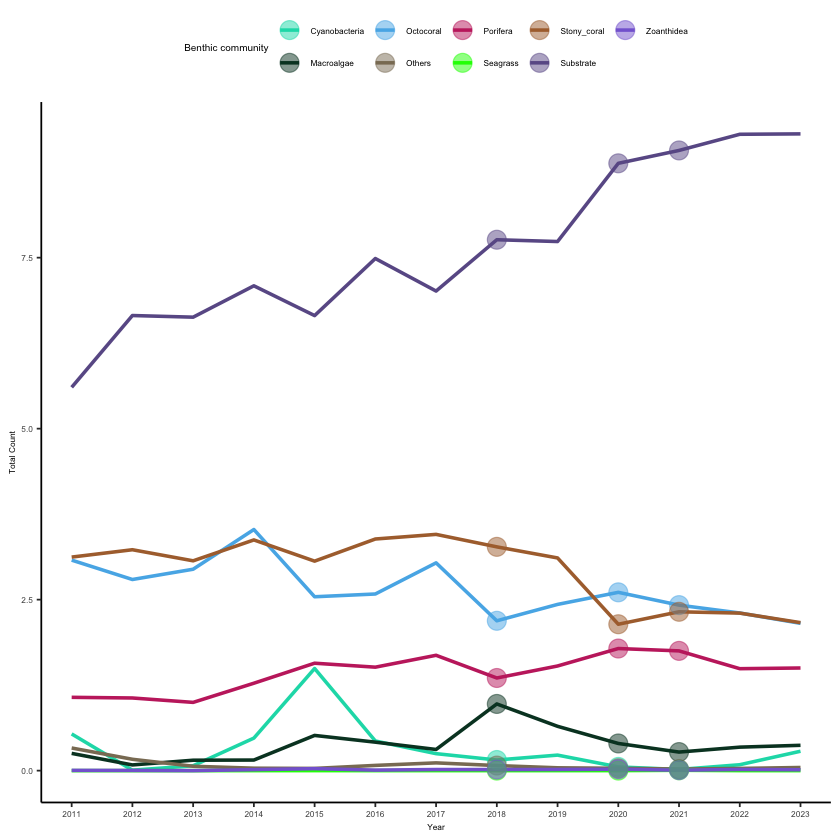

In [384]:


fig3=CREMP_Cover2 %>%


filter (Year >2010) %>%
filter(Cover!="Unknown")  %>%
  ggplot(aes(x = Year, y = Cover_Counts, color = Cover)) +
  
  # Line summarizing counts per year
  stat_summary(fun = sum, geom = "line", size = 1) +
  
  # Add points for 2018, 2020, 2021
  stat_summary(
    data = . %>% filter(Year %in% c(2018, 2020, 2021)),
    fun = sum,
    geom = "point",
    size = 5,
    alpha=0.5
  ) +
scale_color_manual(values=colors) +
  # Show all year ticks
  scale_x_continuous(
    breaks = sort(unique(CREMP_Cover$Year)),
    expand = expansion(add = 0.5)
  ) +
  
  labs(x = "Year", y = "Total Count", color = "Benthic community") +
  theme_classic() +
  theme(
    axis.title.x = element_text(size = 5),
    axis.title.y = element_text(size = 5),
    axis.text.x = element_text(size = 5),
    axis.text.y = element_text(size = 5),
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 6)
  ) +
theme(legend.position="top") +
guides(color = guide_legend(keywidth = .20, , keyheight =.25, nrow=2)) 
fig3

Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_segment()`).”


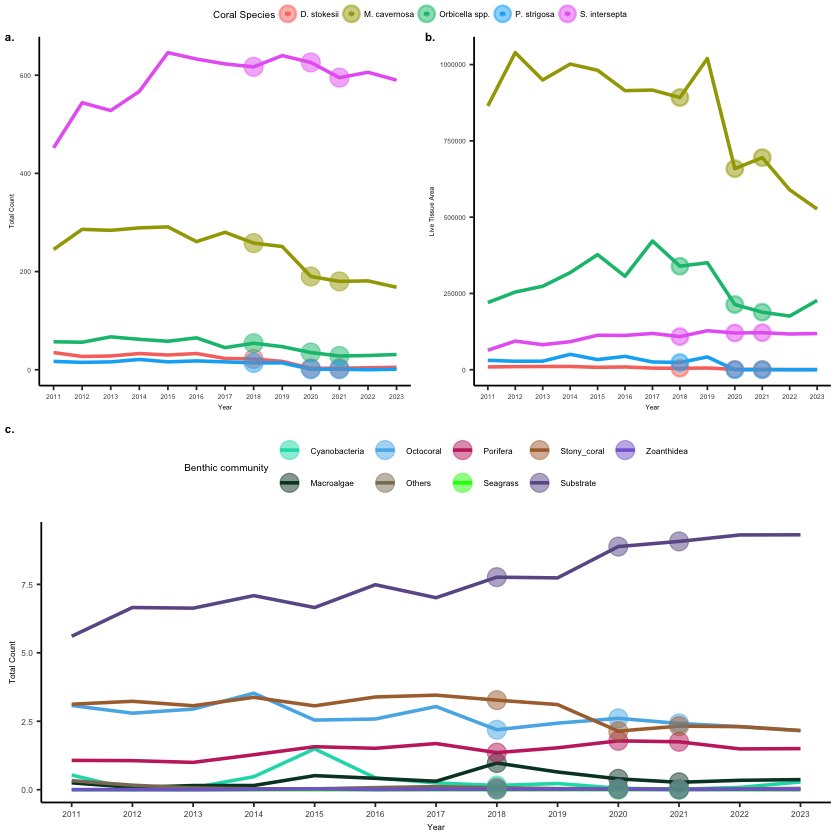

In [385]:
figs_coral=ggarrange(fig1,fig2, nrow =1 , ncol=2, common.legend = TRUE,
                           labels = c("a.","b."), 
                     #label.x=-0.03,
                       font.label = list(size = 7, color = "black")

                    
                    )

#figs_coral

figs_final=ggarrange(figs_coral, fig3, nrow =2 , ncol=1, common.legend = FALSE,
                           labels = c("", "c."), 
                     #label.x=-0.03,
                       font.label = list(size = 7, color = "black"))

                     figs_final
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/Supp_FigX.png",
    width = 5, height =5, units = "in", dpi=300)

In [107]:
temp_long =temp%>%
  group_by(Year, Month, Day, SiteName,) %>%
  summarise(mean_temp = mean(TempC, na.rm = TRUE),
            sd_temp = sd(TempC, na.rm = TRUE)) %>%
filter(Year >2014) %>%
filter(Year <2022)
head(temp_long)

`summarise()` has grouped output by 'Year', 'Month', 'Day'. You can override
using the `.groups` argument.


Year,Month,Day,SiteName,mean_temp,sd_temp
<int>,<int>,<int>,<chr>,<dbl>,<dbl>
2015,1,1,Cliff Green,24.53233,0.03577061
2015,1,1,Red Dun Reef,25.01321,0.09554738
2015,1,1,West Washer Women,24.65225,0.15480879
2015,1,2,Cliff Green,24.71367,0.19575243
2015,1,2,Red Dun Reef,24.88304,0.15227220
2015,1,2,West Washer Women,24.69983,0.12756300


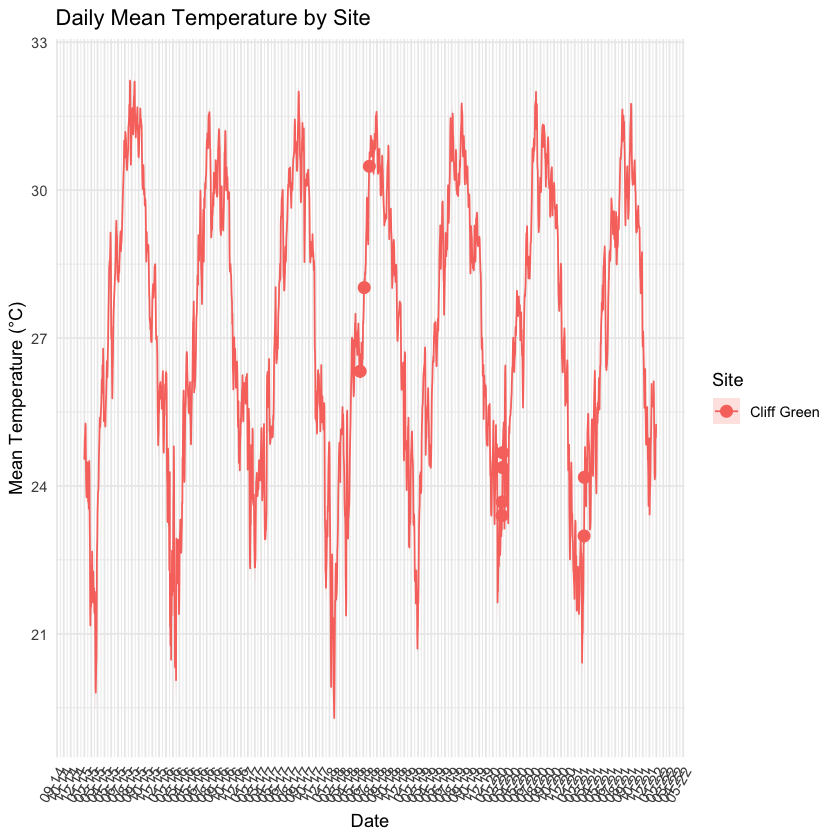

In [324]:
library(lubridate)

# proper date column
temp_long <- temp_long %>%
filter(SiteName=="Cliff Green")  %>%
  mutate(Date = make_date(Year, Month, Day))

# mean_temp over time with error bars
temp_long %>%
filter(SiteName=="Cliff Green")  %>%
ggplot(aes(x = Date, y = mean_temp, color = SiteName, fill = SiteName, group = SiteName)) +
  geom_line() +
  
  # Add points for specific dates
  geom_point(
    data = temp_long %>%
      filter(Date %in% as.Date(c("2018-05-18", "2018-06-05", "2018-06-28", "2020-02-11",
                             "2020-02-12", "2020-02-13", "2020-02-14",
                                "2021-02-12", "2021-02-13"))),
    size = 3
  ) +


  geom_ribbon(aes(ymin = mean_temp - sd_temp,
                  ymax = mean_temp + sd_temp),
              alpha = 0.2,
              color = NA) +

  labs(
    title = "Daily Mean Temperature by Site",
    x = "Date",
    y = "Mean Temperature (°C)",
    color = "Site",
    fill = "Site"
  ) +
  scale_x_date(date_breaks = "1 month", date_labels = "%m-%y") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 60, hjust = 1))


In [174]:
library(dplyr)
library(stringr)
library(tibble)

# Step 1: Clean Site_name in meta
meta <- meta %>%
  mutate(
    Site_name = str_replace_all(Site_name, "\\.", " ") %>%
      str_squish()
  )

# Step 2: Collapse merge_LTA to unique rows per site-year
merge_cover_unique <- CREMP_Cover %>%
  group_by(Site_name, Year) #%>%
  #slice(1)

# Step 3: Merge with meta (using correct join syntax)
merge_all <- merge_cover_unique %>%
  filter(Year > 2017, Site_name == "Cliff Green") %>%
  right_join(
    meta, by = c("Site_name", "Year") 
  ) %>%
  mutate(
   dup_sample.ID = make.unique(as.character(dup_sample.ID))  # adjust column name if needed
  ) %>%
  column_to_rownames("dup_sample.ID")  # replace with your actual ID column

# Check result
head(merge_all)
dim(merge_all)


Warning message in right_join(., meta, by = c("Site_name", "Year")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 64 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


,Year,Date.x,Subregion,Habitat,SiteID,Site_name,StationID,points,Cyanobacteria,Macroalgae,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
R3S7A1,2018,8/9/2018,LK,P,38,Cliff Green,381,996,0.0191,0.007,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A2,2018,8/9/2018,LK,P,38,Cliff Green,381,996,0.0191,0.007,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A3,2018,8/9/2018,LK,P,38,Cliff Green,381,996,0.0191,0.007,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A4,2018,8/9/2018,LK,P,38,Cliff Green,381,996,0.0191,0.007,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A5,2018,8/9/2018,LK,P,38,Cliff Green,381,996,0.0191,0.007,⋯,0,1,0,0,0,0,0,0,0,0
R3S7C1,2018,8/9/2018,LK,P,38,Cliff Green,381,996,0.0191,0.007,⋯,0,1,0,0,0,0,0,0,0,0


[1] 645  48

In [175]:
colnames(merge_all)


[1] "Year"           "Date.x"         "Subregion"      "Habitat"       
 [5] "SiteID"         "Site_name"      "StationID"      "points"        
 [9] "Cyanobacteria"  "Macroalgae"     "Octocoral"      "Others"        
[13] "Porifera"       "Seagrass"       "Stony_coral"    "Substrate"     
[17] "Unknown"        "Zoanthidea"     "samp"           "Sample.ID"     
[21] "Site"           "Region"         "Project"        "Objective"     
[25] "Type"           "Species_sample" "Sample.Type"    "Site.Status"   
[29] "Month"          "Site_Num"       "Date.y"         "Vulnerable"    
[33] "Epidemic"       "Endemic"        "Sediment"       "Coral"         
[37] "Water"          "Zone"           "Types"          "Vul_coral"     
[41] "End_coral"      "Epi_coral"      "Vul_sed"        "End_sed"       
[45] "Epi_sed"        "Vul_wat"        "End_wat"        "Epi_wat"

In [176]:
library(microViz)
library(microbiome)
library(phyloseq)
library("tidyverse")
library(vegan)



library("ggpmisc")
library(patchwork)


library(microViz)
library(qiime2R)

In [185]:
ASV_qza <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/merged_tables_BacArc_fill_EPA2.qza")
ASV_table <- ASV_qza$data
head(ASV_table)

dim(ASV_table)
taxa_qza <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/tax_EPA2.qza")
taxa_table <- taxa_qza$data
taxa_table <- taxa_qza$data %>%
as_tibble() %>% 
#select(-Confidence) %>% 
separate(Taxon, sep=";", c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>%
arrange(Feature.ID) %>%
mutate(ASVs =paste('ASV',1:n(), sep = "_")) %>%
column_to_rownames("Feature.ID")%>%
as.matrix()

,R1.1.W,R1.10.W,R1.11.W,R1.12.W,R1.13.W,R1.14.W,R1.15.W,R1.16.W,R1.17.W,R1.18.W,⋯,GR.SINT.En4,GR.SINT.En5,GR.SINT.En6,TP.DLAB.En1,TP.DLAB.En2,TP.DLAB.En3,TP.DLAB.En4,TP.DLAB.En5,TP.DLAB.En6,TP.DSTO.En1
72caa013fe7649c65ffe72138ff7dfd1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2b248f10cca3c82a2640506132f9c869,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4af34e31f4f29f5372246db273985eb8,12,18,24,19,20,28,21,23,19,26,⋯,0,0,38,0,197,37,149,198,14,0
516a7dfb3358a03ad54608b2bfe54ded,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
63c48fb71320865b89f020cc70ce9bae,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5ca9f99167b7bf31249f42965de904ff,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 11756  1109

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 103262 rows [1, 2, 3, 7,
8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 26, 27, ...].”


In [186]:
ps = phyloseq(otu_table(ASV_table, taxa_are_rows=TRUE), 
               sample_data(merge_all),
tax_table(taxa_table))
ps %>% tax_fix()


#filter to remove noise from data
ps_fill = filter_taxa(ps, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill 

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 360 samples ]
sample_data() Sample Data:       [ 360 samples by 48 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2041 taxa and 360 samples ]
sample_data() Sample Data:       [ 360 samples by 48 sample variables ]
tax_table()   Taxonomy Table:    [ 2041 taxa by 9 taxonomic ranks ]

In [256]:
tax_table(ps)

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Confidence,ASVs
72caa013fe7649c65ffe72138ff7dfd1,d__Bacteria,p__Spirochaetota,c__Spirochaetia,o__Spirochaetales,f__Spirochaetaceae,g__Spirochaeta,NA,0.9973171,ASV_65992
2b248f10cca3c82a2640506132f9c869,d__Bacteria,p__Planctomycetota,c__Planctomycetes,o__Pirellulales,f__Pirellulaceae,NA,NA,0.9997257,ASV_24821
4af34e31f4f29f5372246db273985eb8,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Methyloligellaceae,g__Methyloceanibacter,s__uncultured_bacterium,0.7535425,ASV_42867
516a7dfb3358a03ad54608b2bfe54ded,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_I,g__Clade_Ia,NA,0.7697921,ASV_46593
63c48fb71320865b89f020cc70ce9bae,d__Bacteria,p__Actinobacteriota,c__Coriobacteriia,o__OPB41,f__OPB41,g__OPB41,NA,0.9997895,ASV_57256
5ca9f99167b7bf31249f42965de904ff,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__SAR86_clade,f__SAR86_clade,g__SAR86_clade,s__uncultured_bacterium,0.8169950,ASV_53151
af946788c546eb2d446118fa7bf76c26,d__Bacteria,p__Planctomycetota,c__Planctomycetes,o__Pirellulales,f__Pirellulaceae,g__uncultured,NA,0.8324325,ASV_101073
f3565d0f24fa37db9d1577980c241ab8,d__Bacteria,p__Desulfobacterota,c__Desulfobacteria,o__Desulfobacterales,f__Desulfosarcinaceae,g__Sva0081_sediment_group,s__uncultured_marine,0.7168096,ASV_140349
9e92e6c0dfbd189c0e240e6184124632,d__Bacteria,p__Desulfobacterota,c__Desulfuromonadia,o__Bradymonadales,f__Bradymonadales,g__Bradymonadales,NA,0.9127309,ASV_91253
fd0d4575e0afd64b0f3438bac1507529,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,f__Psychromonadaceae,NA,NA,0.9999227,ASV_145980


In [179]:
write_csv(merge_all, "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/merged_All.csv")

In [181]:
colnames(merge_all)

[1] "Year"           "Date.x"         "Subregion"      "Habitat"       
 [5] "SiteID"         "Site_name"      "StationID"      "points"        
 [9] "Cyanobacteria"  "Macroalgae"     "Octocoral"      "Others"        
[13] "Porifera"       "Seagrass"       "Stony_coral"    "Substrate"     
[17] "Unknown"        "Zoanthidea"     "samp"           "Sample.ID"     
[21] "Site"           "Region"         "Project"        "Objective"     
[25] "Type"           "Species_sample" "Sample.Type"    "Site.Status"   
[29] "Month"          "Site_Num"       "Date.y"         "Vulnerable"    
[33] "Epidemic"       "Endemic"        "Sediment"       "Coral"         
[37] "Water"          "Zone"           "Types"          "Vul_coral"     
[41] "End_coral"      "Epi_coral"      "Vul_sed"        "End_sed"       
[45] "Epi_sed"        "Vul_wat"        "End_wat"        "Epi_wat"

In [250]:
# Subset samples for Sediment type
ps_AH <- subset_samples(ps_fill, Sample.Type=="Healthy")


In [240]:
ps_clr <- microbiome::transform(ps_fill, 'clr')

In [188]:
ps_clr_ord<- ordinate(ps_clr, "RDA", "euclidean")

Dropping samples with missings: 84


Some constraints or conditions were aliased because they were redundant. This
can happen if terms are linearly dependent (collinear): ‘Octocoral’, ‘Others’,
‘Porifera’, ‘Seagrass’, ‘Stony_coral’, ‘Substrate’



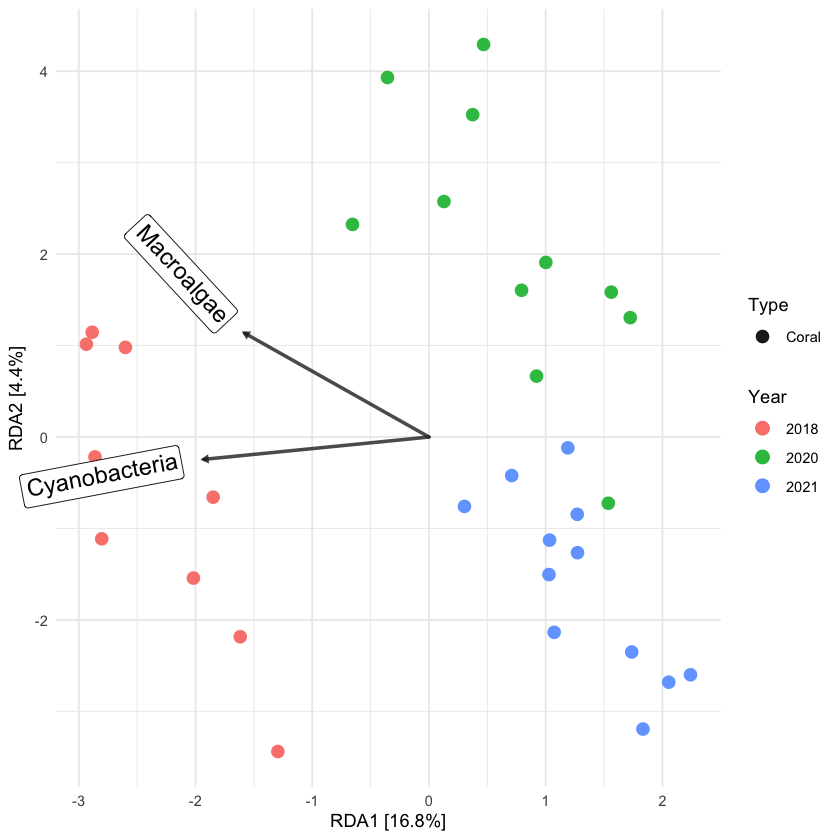

In [245]:
library(ggtext)
ord_RDA= ps_AH %>%
tax_fix() %>%
  tax_transform("clr", rank = "Class") %>%

  ord_calc(
    constraints = c("Cyanobacteria",
                               "Macroalgae",  "Octocoral", "Others", "Porifera", "Seagrass",
                                                "Stony_coral", "Substrate"),
    scale_cc = FALSE) %>%  # doesn't make a difference %>%
  
ord_plot(
    colour = "Year", size = 3.5, alpha = 0.9, shape = "Type",
    #plot_taxa = 1:5, 
    auto_caption = NA,  
     constraint_vec_style = vec_constraint(1, colour = "grey15"),
    constraint_lab_style = constraint_lab_style(
      max_angle = 90, size = 5, aspect_ratio = 1.5, colour = "black"
    
  )) 

ord_RDA

In [224]:
benthic_data <- CREMP_Cover %>%
filter(Year==c(2018, 2020,2021)) %>%
filter(Site_name=="Cliff Green") %>%
  select(Cyanobacteria, Macroalgae, Octocoral, Others, Porifera, Seagrass, Stony_coral, Substrate, Zoanthidea) %>%
  na.omit()  # remove rows with NAs

In [225]:
cor_matrix <- cor(benthic_data)
round(cor_matrix, 2)

Warning message in cor(benthic_data):
“the standard deviation is zero”


,Cyanobacteria,Macroalgae,Octocoral,Others,Porifera,Seagrass,Stony_coral,Substrate,Zoanthidea
Cyanobacteria,1.00,0.99,-0.78,0.99,-0.27,NA,0.95,-0.94,NA
Macroalgae,0.99,1.00,-0.86,1.00,-0.13,NA,0.98,-0.88,NA
Octocoral,-0.78,-0.86,1.00,-0.84,-0.39,NA,-0.94,0.52,NA
Others,0.99,1.00,-0.84,1.00,-0.17,NA,0.98,-0.90,NA
Porifera,-0.27,-0.13,-0.39,-0.17,1.00,NA,0.04,0.59,NA
Seagrass,NA,NA,NA,NA,NA,1,NA,NA,NA
Stony_coral,0.95,0.98,-0.94,0.98,0.04,NA,1.00,-0.78,NA
Substrate,-0.94,-0.88,0.52,-0.90,0.59,NA,-0.78,1.00,NA
Zoanthidea,NA,NA,NA,NA,NA,NA,NA,NA,1


In [266]:
#RF ASVs subset 
GoodTaxa= c("1fb9e017d2e191d46804b5f10b9a03a8", "8f0a02f2faf8622f26e0977de7d38070",
  "48a6a0e363dfb3823afdb092a0bb834d", "c5f1d88c1958eb9e94f80c8fe5c4104d",
  "3f07eda204c40b259bfc2a2767160422", "5edf532036eebd3ff595117346a421ed",
  "df0410a848333662370dd8e61fa53167", "6546443bbb762c99b362dbbdc0c89c64",
  "c3c32c0479bf4d183832a2e3cf235481", "c8505c947a6696f4eca48bfad4dec697",
  "4d66a7d27240494227d580175f8627e5", "c168fb0898f6c5d8daf41a7c05ff9c16",
  "c595de1845ebd5bb497bed4ad0a56431", "592ae05cee1967d9d4af52cfefa21bb2",
  "c4f69495f0d5abd46f0f7ee44d476d5f", "0efbe04b1712b9d868411ec72dd2cccd",
  "0724eec66e6ef3da3b155c5b7d1e578d", "86dcd5fc024fe1c5626ae1aeabb03ed3",
  "e2a4beb41993a9169f269552b7b3c367", "2cfb7522e9e5547d5df152690a558825",
  "a6469324ff3e3707fcd11c8d7c985280", "65262cb6a9c3b528519b8ce0100df55e",
  "a8764948bd67ad6c2de466a4b8f2a635", "6bcbb9c569bbe9f807f1c00948536d34",
  "03ec7867678fead02390e823192d72af", "b2e23733caf796ee41827098432938c8",
  "01a1466ad844b0d1ceddcad63732afd5", "263d27333144d885cfee9981942da851",
  "3910b59c4555cb9fffedf408e94a0de8", "510ef154f5a500b91459bec4787d1722",
  "be8b0d0c1c2fa13bebd4b6ad2daa44ca", "cd2f76f0ab4fd26ae84f923fb562cce6",
  "ea5c3b42e9e4886bd084d1d229e9d836")

allTaxa = taxa_names(ps_AH)
allTaxa <- allTaxa[(allTaxa %in% GoodTaxa)]
ps_fill_tax = prune_taxa(allTaxa, ps_AH)
ps_fill_tax

#Remove the two samples that did not have depth information
#ps_fill_tax =  subset_samples(ps_fill_tax, Depth!= "NA")
#ps_fill_tax


#Select Metadata of interest 
ps_fill_tax_meta= data.frame(sample_data(ps_fill_tax)) %>% 
select("Cyanobacteria", "Macroalgae", "Stony_coral")

colnames(ps_fill_tax_meta)

#plot correlation map

fig_corr_reef=cor_heatmap(
  data = ps_fill_tax, cor = "spearman", vars = c("Cyanobacteria"),
 taxa_side = "left",    tax_anno = taxAnnotation(
    Log10 = anno_tax_density(
        #joyplot_scale = 1.5, 
        gp = grid::gpar(fill = "blue", alpha = 0.2),
        trans = "log10", zero_replace = 0.0001
 
 
    )))


gg_rf_reef= as.ggplot(fig_corr_reef)

gg_rf_reef

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 12 taxa and 117 samples ]
sample_data() Sample Data:       [ 117 samples by 48 sample variables ]
tax_table()   Taxonomy Table:    [ 12 taxa by 9 taxonomic ranks ]

[1] "Cyanobacteria" "Macroalgae"    "Stony_coral"

ERROR: Error in seriate.dist(dists, method = method): NAs not allowed in distance matrix x!


In [267]:
ps_fill_tax

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 12 taxa and 117 samples ]
sample_data() Sample Data:       [ 117 samples by 48 sample variables ]
tax_table()   Taxonomy Table:    [ 12 taxa by 9 taxonomic ranks ]